# Mobile Phone Prices Classification

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics,datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [138]:
df_train = pd.read_csv('train.csv')

# Analysing the data

In [139]:
df_train.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [140]:
len(df_train['n_cores'].unique())

8

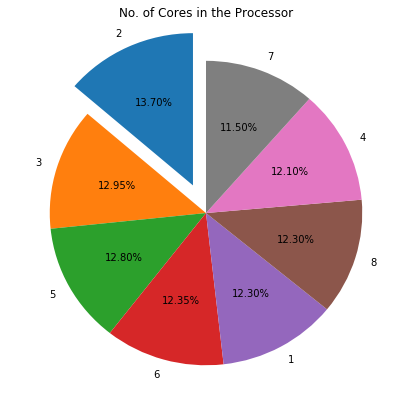

In [141]:
#pie chart showing the distribution of number of cores in the phone
labels = df_train['n_cores'].unique()
values = np.array(df_train['n_cores'].value_counts().values)
explode = np.zeros(len(labels))
explode[values.argmax()] = 0.2
plt.figure(figsize=(7,7))
plt.title('No. of Cores in the Processor')
plt.pie(x=values,labels=labels, explode=explode,autopct='%1.2f%%',startangle=90)
plt.show()

In [142]:
df_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

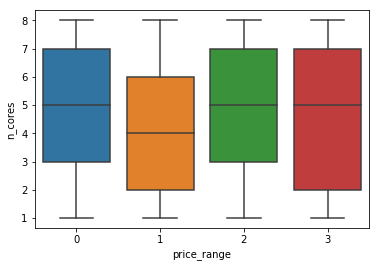

In [143]:
#price vs number of processor cores
sns.boxplot(x="price_range", y="n_cores", data=df_train)

Text(0.5,0,'MegaPixels')

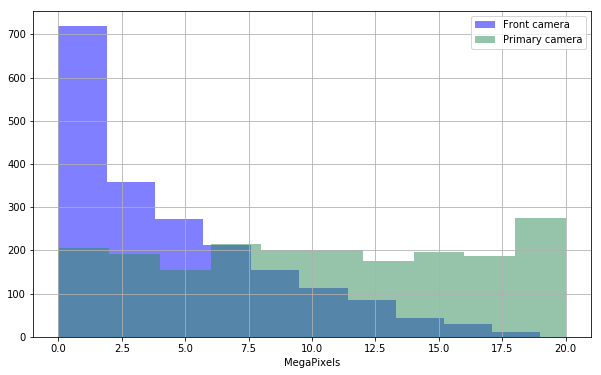

In [133]:
#camera megapixels distribution
plt.figure(figsize=(10,6))
df_train['fc'].hist(alpha=0.5,color='blue',label='Front camera')
df_train['pc'].hist(alpha=0.5,color='seagreen',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

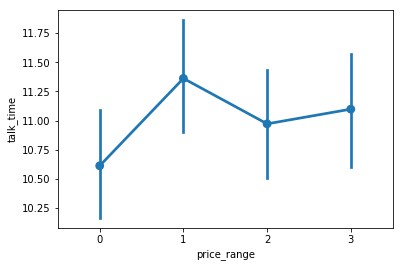

In [136]:
sns.pointplot(y="talk_time", x="price_range", data=df_train)

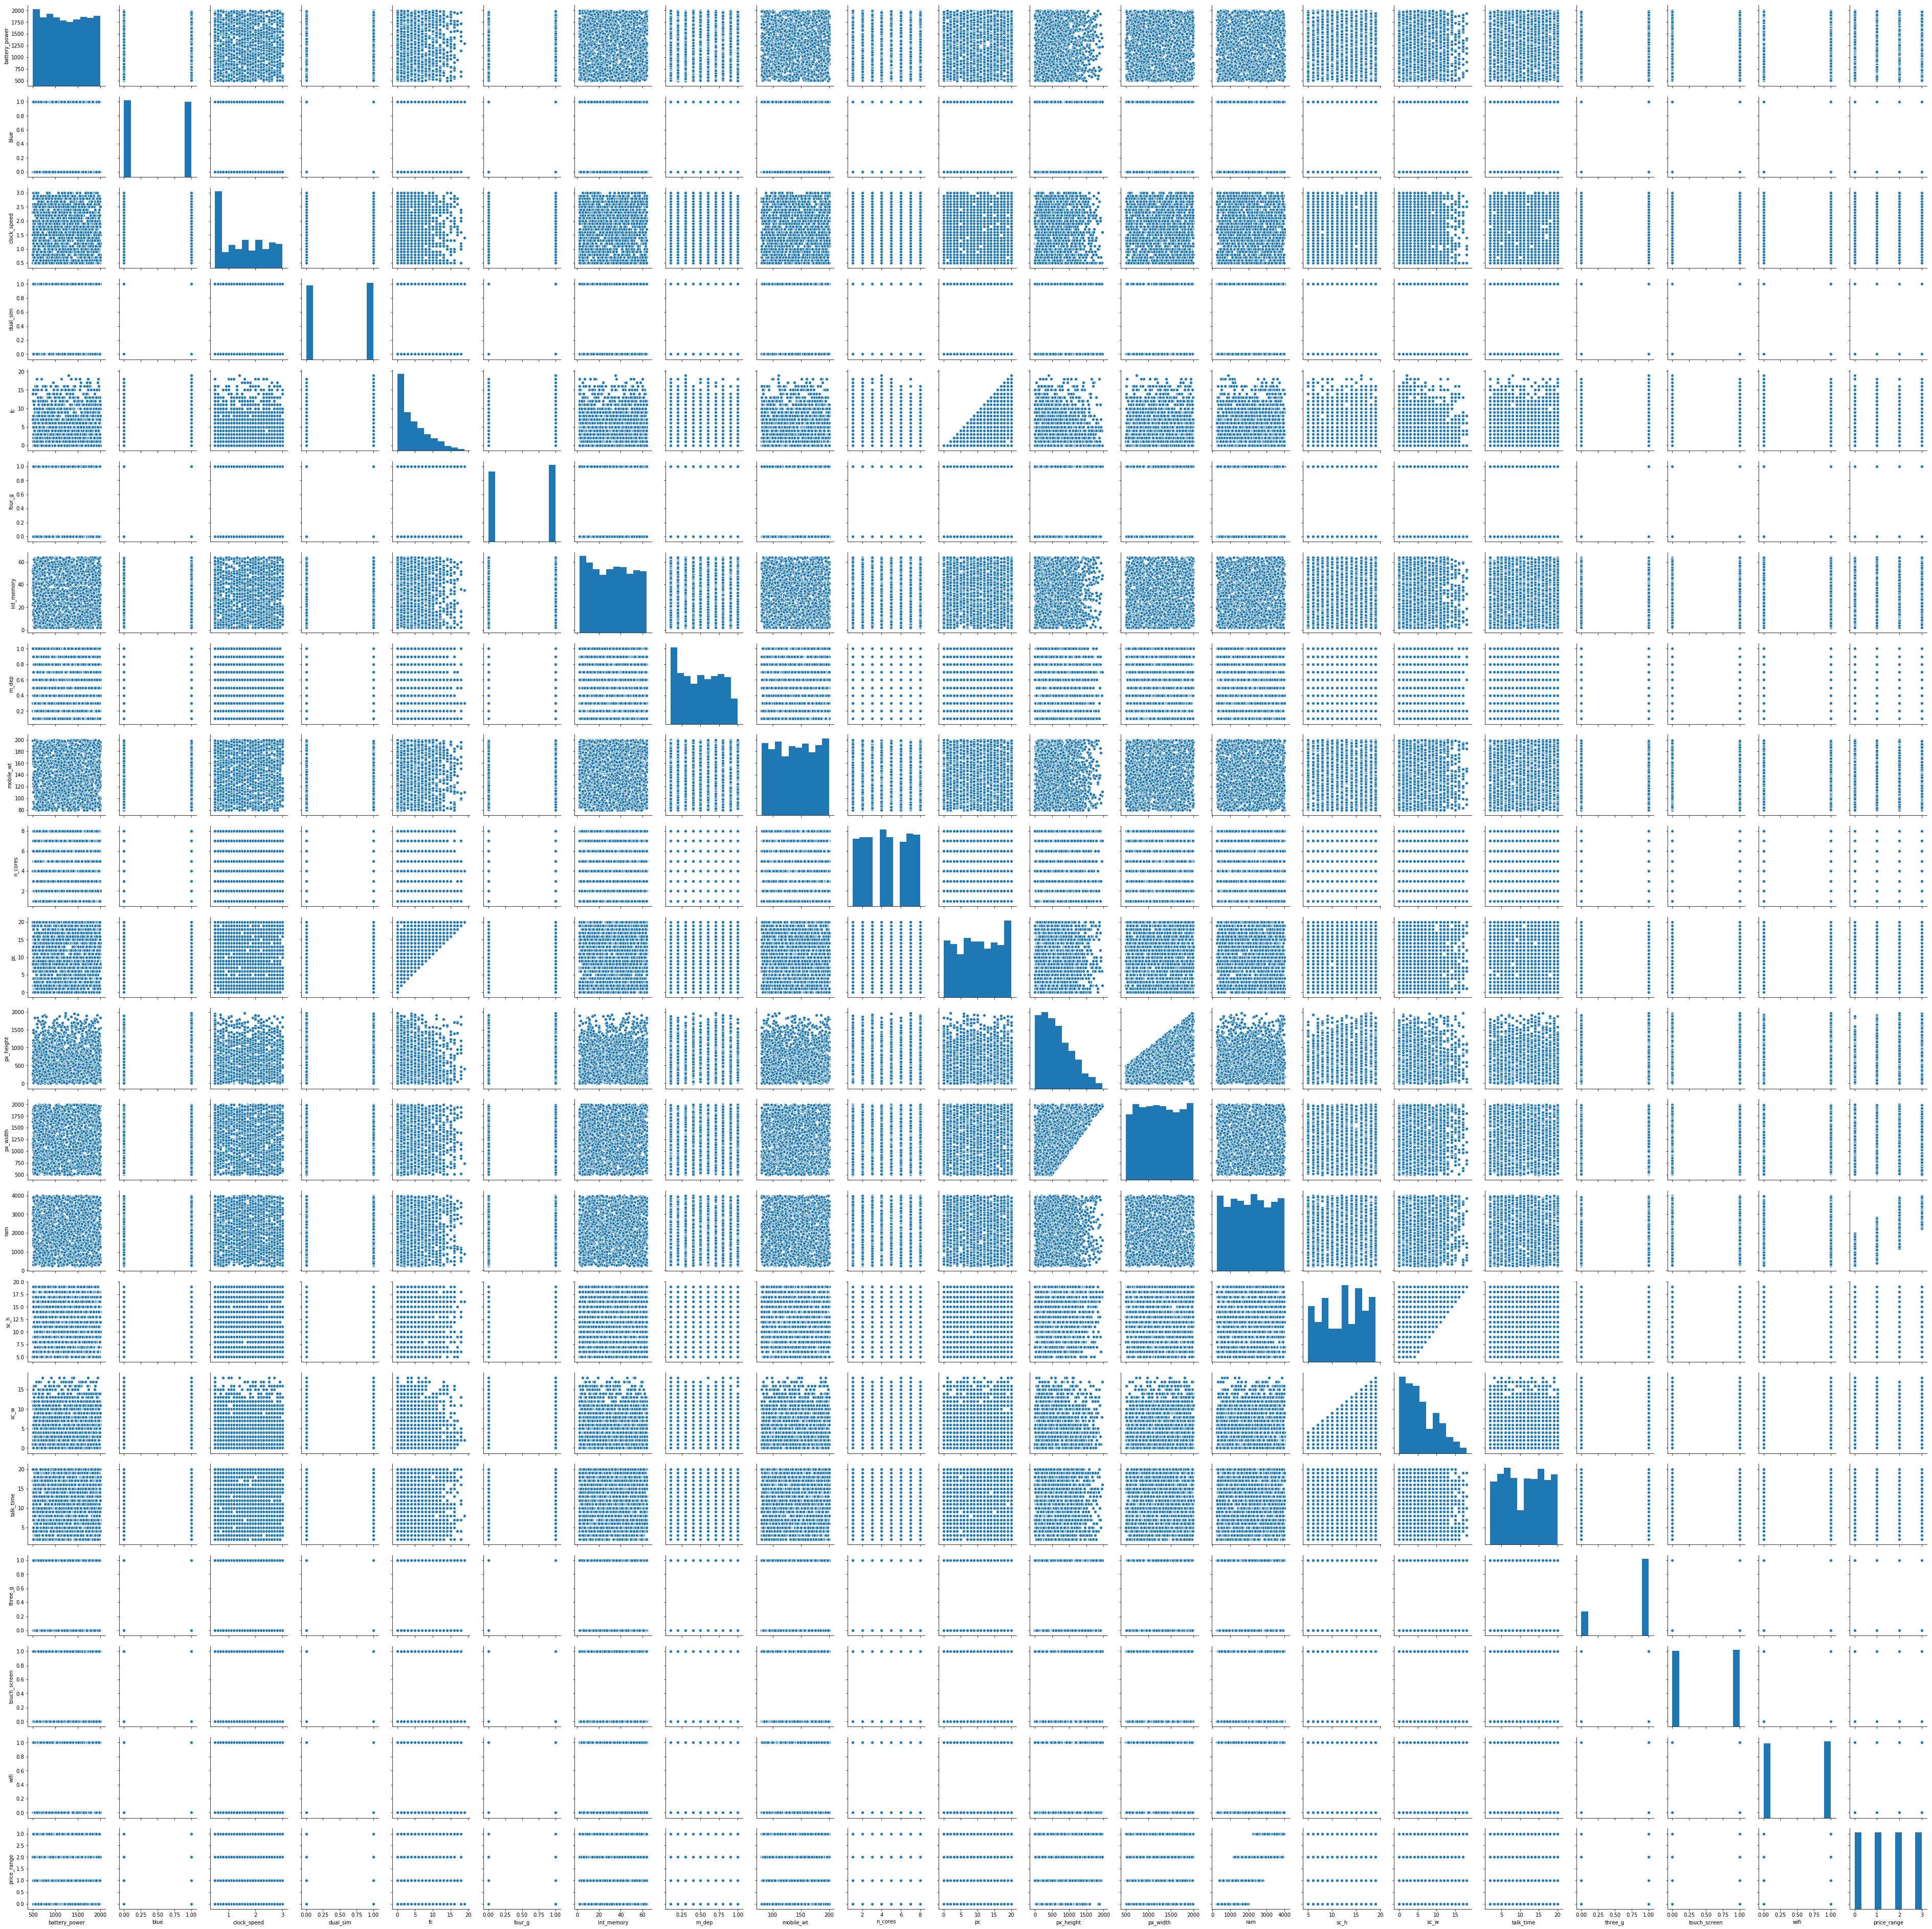

In [137]:
sns.pairplot(df_train)

In [83]:
X = df_train.drop('price_range',axis=1)
Y = df_train['price_range']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25)
model_NB = GaussianNB()
model_NB.fit(X_train,Y_train)

ValueError: Unknown label type: (array([  15938.65792329,   88591.77016004,  143027.36445248, ...,
       2330289.70068344, 2370231.32010155, 2469065.5941747 ]),)

In [13]:
predictions_NB = model_NB.predict(X_test)

In [14]:
print(metrics.classification_report(Y_test,predictions_NB))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89        63
           1       0.91      0.97      0.94       108

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



In [15]:
print(metrics.confusion_matrix(Y_test,predictions_NB))

[[ 53  10]
 [  3 105]]


In [16]:
print('Accuracy = ' + str(metrics.accuracy_score(Y_test,predictions_NB)))

Accuracy = 0.9239766081871345


<Figure size 720x432 with 0 Axes>

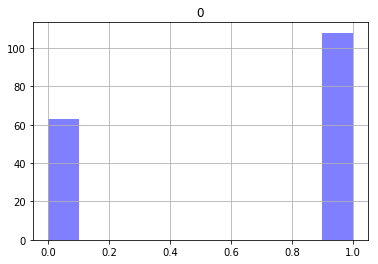

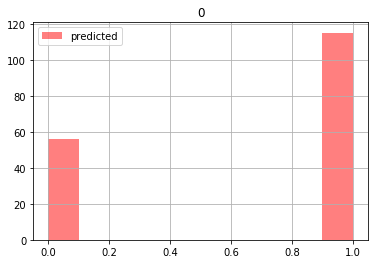

In [17]:
plt.figure(figsize=(10,6))
Y_test.hist(alpha=0.5,color='blue',label='expected')
pd.DataFrame(predictions_NB).hist(alpha=0.5,color='red',label='predicted')
plt.legend()
plt.show()

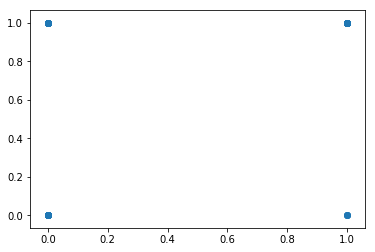

In [51]:
plt.scatter(Y_test,predictions_NB)

In [18]:
#Using SVM
from sklearn import svm

In [19]:
model_svm = svm.SVC(kernel='linear')

In [20]:
model_svm.fit(X_train,Y_train)

predictions_svm = model_svm.predict(X_test)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
print(metrics.classification_report(Y_test,predictions_svm))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        63
           1       0.92      1.00      0.96       108

    accuracy                           0.94       171
   macro avg       0.96      0.92      0.93       171
weighted avg       0.95      0.94      0.94       171



In [22]:
print(metrics.confusion_matrix(Y_test,predictions_svm))

[[ 53  10]
 [  0 108]]


In [23]:
print('Accuracy = ' + str(metrics.accuracy_score(Y_test,predictions_svm)))

Accuracy = 0.9415204678362573


<Figure size 720x432 with 0 Axes>

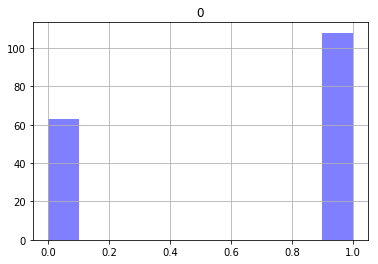

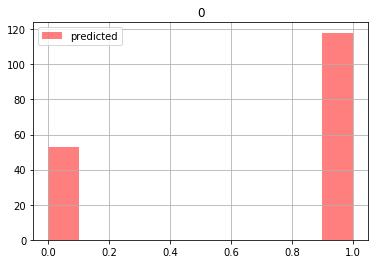

In [24]:
plt.figure(figsize=(10,6))
Y_test.hist(alpha=0.5,color='blue',label='expected')
pd.DataFrame(predictions_svm).hist(alpha=0.5,color='red',label='predicted')
plt.legend()
plt.show()

In [37]:
#Using K Means
from sklearn.neighbors import KNeighborsClassifier as knn
from numpy import linspace

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Text(0,0.5,'accuracy_score')

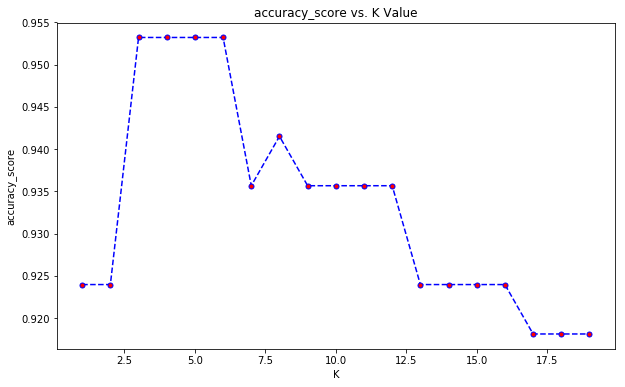

In [39]:
accuracy_score = []
for i in range(1,20):
    model_knn = knn(n_neighbors = i)
    model_knn.fit(X_train,Y_train)
    
    predictions_knn = model_knn.predict(X_test)
    accuracy_score.append(metrics.accuracy_score(Y_test,predictions_knn))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,20),accuracy_score,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('accuracy_score vs. K Value')
plt.xlabel('K')
plt.ylabel('accuracy_score')

In [42]:
#Using Linear regression
from sklearn.linear_model import LinearRegression

In [46]:
model_lr = LinearRegression()
model_lr.fit(X_train,Y_train)

print(model_lr.score(X_test,Y_test))

0.7316705000388083


In [48]:
#Using logistic Regression
from sklearn.linear_model import LogisticRegression

In [50]:
model_logR = LogisticRegression()
model_logR.fit(X_train,Y_train)

model_logR.score(X_test,Y_test)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9532163742690059